In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.color
import random

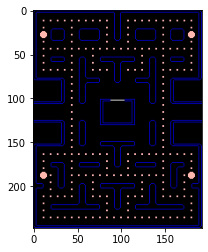

(248, 192, 3)
(2, 2, 3)


In [5]:
maze = cv2.imread('inputs/P4/maze.png')[:, :, ::-1]
fig, ax = plt.subplots()
plt.imshow(maze)
plt.show()
print(maze.shape)

dot = cv2.imread('inputs/P4/dot.png')
print(dot.shape)


gray_maze = skimage.color.rgb2gray(maze)


t_start = 0.72
t_stop = 0.77
binary_start_maze = (gray_maze > t_start)
binary_stop_maze = (gray_maze < t_stop)
binary_maze = np.logical_and(binary_start_maze, binary_stop_maze)

pacman_closed = cv2.imread('inputs/P4/pacman_closed.png')[:, :, ::-1]
move_type = ["move1_down.png",
             "move1_left.png",
             "move1_right.png",
             "move1_up.png",
             "move2_left.png",
             "move2_right.png",
             "move2_up.png",
             "move2_down.png"
             ]
ghost_names = ["blinky_", "clyde_", "inky_", "pinky_"]


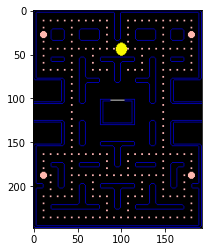

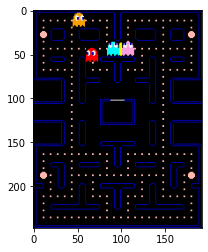

In [7]:
def init_game(maze_img,item_imgs):
    selected_ghost_names = []
    for i in range(len(ghost_names)):
        selected_ghost_names.append(ghost_names[i] + move_type[random.randint(0, len(move_type) - 1)])

    # select random points
    x_pos = []
    y_pos = []
    for i in range(0, 5):
        x_idx, y_idx = np.where(binary_maze == True)  # list of all the indices with pixel value True
        rand_idx = np.random.choice(x_idx)   # randomly choose any element in the x_idx list
        x_pos.append(x_idx[rand_idx])
        y_pos.append(y_idx[rand_idx])
        # delete selected points to not select them in next iter
        binary_maze[x_idx[rand_idx]: x_idx[rand_idx]+8, y_idx[rand_idx]: y_idx[rand_idx] + 8] = False
        binary_maze[x_idx[rand_idx] - 8: x_idx[rand_idx], y_idx[rand_idx]: y_idx[rand_idx] + 8] = False
        binary_maze[x_idx[rand_idx]: x_idx[rand_idx] + 8, y_idx[rand_idx] - 8: y_idx[rand_idx]] = False
        binary_maze[x_idx[rand_idx] - 8: x_idx[rand_idx], y_idx[rand_idx] - 8: y_idx[rand_idx]] = False


    x, y, z = pacman_closed.shape
    x_lobe = int(x/2)
    y_lobe = int(y/2)
    maze[x_pos[0] - x_lobe: x_pos[0] + x - x_lobe, y_pos[0] - y_lobe: y_pos[0] + y - y_lobe, :] = pacman_closed[:, :, :]

    fig, ax = plt.subplots()
    plt.imshow(maze)
    plt.show()

    # set ghosts in selected points
    for i in range(len(selected_ghost_names)):
        ghost = cv2.imread('inputs/P4/' + selected_ghost_names[i])[:, :, ::-1]
        x, y, z = ghost.shape
        x_lobe = int(x / 2)
        y_lobe = int(y / 2)
        maze[x_pos[i+1] - x_lobe: x_pos[i+1] + x - x_lobe, y_pos[i+1] - y_lobe: y_pos[i+1] + y - y_lobe, :] = \
            ghost[:, :, :]

    fig, ax = plt.subplots()
    plt.imshow(maze)
    plt.show()

game_img = init_game(binary_maze,ghost_names)